# Logistic Regression


In [1]:
import numpy as np
import pickle
import bz2
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import TruncatedSVD


In [2]:
# load training data
Xtr_loadpath = 'Xtr.csv'
Xts_loadpath = 'Xts.csv'
ytr_loadpath = 'ytr.csv'


Xtr = np.loadtxt(Xtr_loadpath, delimiter=",")
Xts = np.loadtxt(Xts_loadpath, delimiter=",")
ytr = np.loadtxt(ytr_loadpath, delimiter=",")

num_features = Xtr.shape[1]
num_samples = Xtr.shape[0]
print(num_features)
print(num_samples)



16
10000


In [3]:
from scipy.stats import skew
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer


scaler=StandardScaler()
xmean=np.mean(Xtr,axis=0)
xstd=np.std(Xtr,axis=0)
Xtr_standardized = (Xtr-xmean[None,:])/xstd[None,:]
Xts_standardized = (Xts-xmean[None,:])/xstd[None,:]

# save the standardized training data
Xtr_savepath = 'Xtr_sklearn.csv'
Xts_savepath = 'Xts_sklearn.csv'
yts_hat_savepath = 'yts_hat_sklearn.csv'

np.savetxt(Xtr_savepath, Xtr_standardized, delimiter=",")
np.savetxt(Xts_savepath, Xts_standardized, delimiter=",")

X_train, X_test, y_train, y_test = train_test_split(Xtr_standardized, ytr, test_size=0.25, shuffle=True)

Performing Logistic Regression with OVR and Multinomial to check accuracy

In [4]:
####
####
###OVR
#####


lr11 =LogisticRegression(penalty='none',multi_class='ovr',solver='saga',max_iter=10000)
lr11.fit(X_train, y_train)
yhattest = lr11.predict(X_test)
test_accuracy = np.mean(yhattest == y_test)
print(f"Accuracy on test data using OVR classifiction = {test_accuracy*100} %")


####
####
###Multinomial
#####

lr21 =LogisticRegression(penalty='none',multi_class='multinomial',solver='saga',max_iter=10000)
lr21.fit(X_train, y_train)
yhattest = lr21.predict(X_test)
test_accuracy = np.mean(yhattest == y_test)
print(f"Accuracy on test data using multinomial classifiction = {test_accuracy*100} %")

Accuracy on test data using OVR classifiction = 72.44 %
Accuracy on test data using multinomial classifiction = 76.8 %


OVR and Multinomial with L1 penalty

In [5]:

####
####
###OVR+L1
#####
lr_l12 =  LogisticRegression(penalty='l1',C=150,multi_class='ovr',solver='saga',max_iter=100000)
lr_l12.fit(X_train, y_train)
ytr_lr_multi_l1 = lr_l12.predict(X_test)
test_accuracy = np.mean(ytr_lr_multi_l1 == y_test)
print(f"Accuracy on test data using OVR classifiction with L1 = {test_accuracy*100} %")

####
####
###Multinomial +L1
#####

#lr_l22 =  LogisticRegression(penalty='l1',C=150,multi_class='multinomial',solver='saga',max_iter=100000)
lr_l22 =LogisticRegression(penalty='l1',C=150,multi_class='multinomial',solver='saga',max_iter=10000)

lr_l22.fit(X_train, y_train)
ytr_lr_multi_l1 = lr_l22.predict(X_test)
test_accuracy = np.mean(ytr_lr_multi_l1 == y_test)
print(f"Accuracy on test data using multinomial classifiction with L1 = {test_accuracy*100} %")


Accuracy on test data using OVR classifiction with L1 = 72.44 %
Accuracy on test data using multinomial classifiction with L1 = 76.8 %


In [6]:

####
####
###OVR+L2
#####
lr_l13 =  LogisticRegression(penalty='l2',C=1e5,multi_class='ovr',solver='saga',max_iter=10000)
lr_l13.fit(X_train, y_train)
ytr_lr_multi_l31 = lr_l12.predict(X_test)
test_accuracy = np.mean(ytr_lr_multi_l31 == y_test)
print(f"Accuracy on test data using OVR classifiction with L2 = {test_accuracy*100} %")
print('\n')

####
####
###Multinomial + L2
#####

lr_l23 =  LogisticRegression(penalty='l2',C=1e5,multi_class='multinomial',solver='saga',max_iter=10000)
lr_l23.fit(X_train, y_train)
ytr_lr_multi_l41 = lr_l23.predict(X_test)
test_accuracy = np.mean(ytr_lr_multi_l41 == y_test)
print(f"Accuracy on test data using multinomial classifiction with L2 = {test_accuracy*100} %")


Accuracy on test data using OVR classifiction with L2 = 72.44 %


Accuracy on test data using multinomial classifiction with L2 = 76.8 %


In [7]:
C_values = np.linspace(1, 200, 50)
num_folds = 5 
from sklearn.model_selection import StratifiedKFold

train_accuracy = []
test_accuracy = []

kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

param={'C':C_values}
logreg = LogisticRegression(penalty='l2', C=C_values, multi_class='multinomial', solver='saga', max_iter=10000)
gscv=GridSearchCV(logreg,param,cv=kf,scoring='accuracy',n_jobs=-1)
gscv.fit(X_train,y_train)
rsq_cv =gscv.cv_results_['mean_test_score']
maxacc=gscv.best_score_
maxalpha=gscv.best_params_['C']
print("Best value for C: %f" % maxalpha)



Best value for C: 25.367347


Accuracy on test data = 0.768400


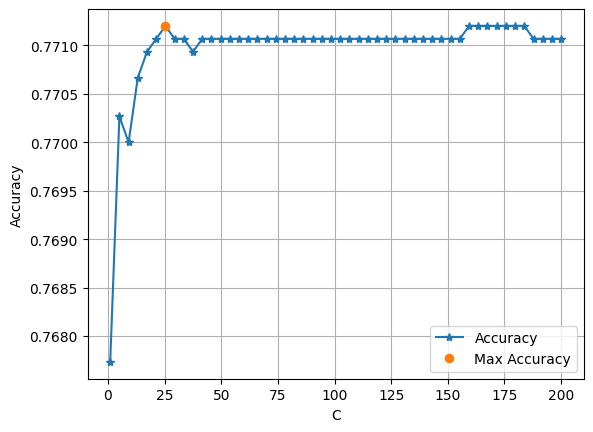

In [9]:
fig,ax=plt.subplots()

plt.plot(C_values,rsq_cv,'-*',label='Accuracy')
#plt.scatter(C_values,rsq_cv,color='r')

plt.plot(maxalpha,maxacc,'o',label='Max Accuracy')
plt.plot()
#plt.xscale("log")
plt.ylabel('Accuracy')
plt.xlabel('C')
plt.grid()
plt.legend()
plt.savefig('L2gridsearch.pdf')

logreg = LogisticRegression(penalty='l2', C=maxalpha, multi_class='multinomial', solver='saga', max_iter=10000)
logreg.fit(X_train,y_train)
yhat_ts = logreg.predict(X_test)
acc_test = np.mean(yhat_ts == y_test)
print("Accuracy on test data = %f" % acc_test)


In [10]:
C_values = np.linspace(1, 200, 50)
num_folds = 5 
from sklearn.model_selection import StratifiedKFold

train_accuracy = []
test_accuracy = []

kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

param={'C':C_values}
logreg = LogisticRegression(penalty='l1', C=C_values, multi_class='multinomial', solver='saga', max_iter=10000)
gscv=GridSearchCV(logreg,param,cv=kf,scoring='accuracy',n_jobs=-1)
gscv.fit(X_train,y_train)
rsq_cv =gscv.cv_results_['mean_test_score']
maxacc=gscv.best_score_
maxalpha=gscv.best_params_['C']
print("Best value for C: %f" % maxalpha)



Best value for C: 86.285714


Accuracy on test data = 0.768400


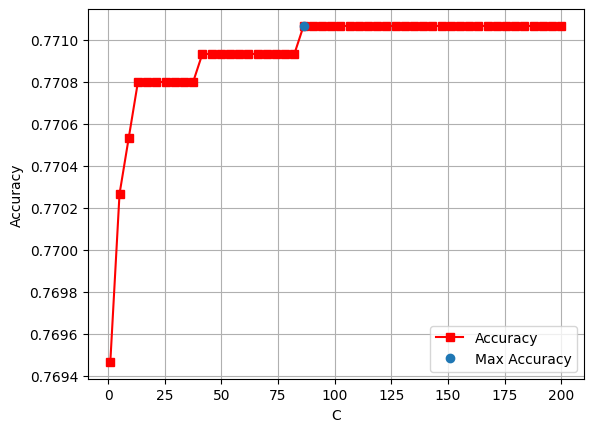

In [12]:
fig,ax=plt.subplots()

plt.plot(C_values,rsq_cv,'-s',color='r',label='Accuracy')
#plt.scatter(C_values,rsq_cv,color='r')

plt.plot(maxalpha,maxacc,'o',label='Max Accuracy')
plt.plot()
#plt.xscale("log")
plt.ylabel('Accuracy')
plt.xlabel('C')
plt.grid()
plt.legend()
plt.savefig('L1gridsearch.pdf')

logreg = LogisticRegression(penalty='l1', C=maxalpha, multi_class='multinomial', solver='saga', max_iter=10000)
logreg.fit(X_train,y_train)
yhat_ts = logreg.predict(X_test)
acc_test = np.mean(yhat_ts == y_test)
print("Accuracy on test data = %f" % acc_test)


/home/pacs/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


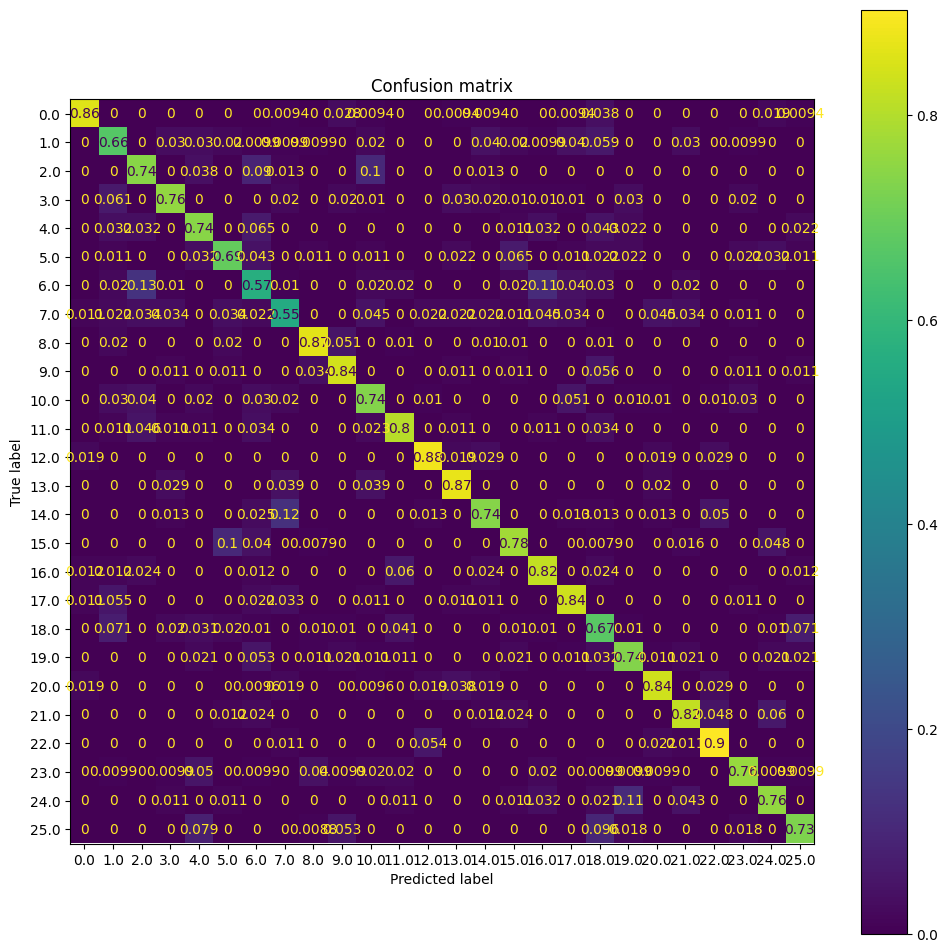

In [15]:
from sklearn.metrics import plot_confusion_matrix
fig, ax = plt.subplots(figsize=(12, 12))
clf = LogisticRegression(penalty='l1', C=maxalpha, multi_class='multinomial', solver='saga', max_iter=10000)
clf.fit(X_train, y_train)
plot_confusion_matrix(clf, X_test, y_test, ax=ax,normalize='true')
plt.title('Confusion matrix')
plt.show()

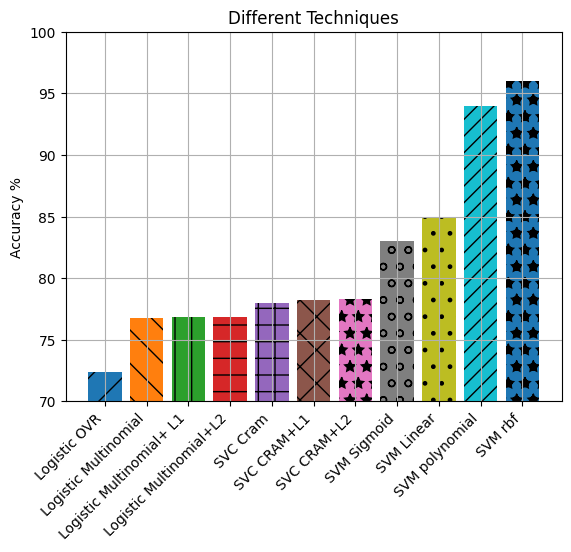

In [43]:
import matplotlib.pyplot as plt

# Sample data
categories = ['Logistic OVR', 'Logistic Multinomial', 'Logistic Multinomial+ L1', 'Logistic Multinomial+L2', 'SVC Cram','SVC CRAM+L1','SVC CRAM+L2', 'SVM Sigmoid','SVM Linear',  'SVM polynomial', 'SVM rbf']
values = [72.4, 76.80, 76.84, 76.84, 78,78.24,78.28, 83,85, 94,96]

# Create a bar plot with different hatch patterns
fig, ax = plt.subplots()

# Create numeric positions for each category
x_positions = range(len(categories))
hatch_patterns = ['/', '\\', '|', '-', '+', 'x', '*', 'o', '.','//','*o']

# Loop through categories and hatch patterns
for i, (category, value, hatch) in enumerate(zip(categories, values, hatch_patterns)):
    bar = ax.bar(x_positions[i], value, hatch=hatch, label=f'Bar {i+1}')

# Set x-axis ticks and labels
ax.set_xticks(x_positions)
ax.set_xticklabels(categories, rotation=45, ha='right')
plt.ylim([70,100])
# Add labels and title
plt.title('Different Techniques')
ax.set_ylabel('Accuracy %')
plt.grid()
# Show the plot
plt.savefig('Finaccuracy.pdf')
